# **EMPLOYEE SALARY PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read Data File /Csv File:**

In [ ]:
data=pd.read_csv("/content/employee_salary_prediction.csv")
data.head()

,experience_yrs,age,gender,education,role,city_tier,industry,certifications,salary
0,5.0,30,Female,MSc,Junior Analyst,Tier-2,Tech,5.0,75000
1,11.0,35,Female,BSc,ML Engineer,Tier-3,Retail,4.0,92000
2,7.0,30,Male,BSc,Junior Analyst,Tier-1,NaN,4.0,86000
3,8.0,30,Female,MSc,Senior Data Engineer,Tier-2,Healthcare,5.0,124000
4,7.0,26,Female,MSc,Junior Analyst,Tier-3,Retail,1.0,64000


### **Number Of Rows And Columns**

In [ ]:
data.shape

(520, 9)

### **List Of Columns**

In [ ]:
data.columns

Index(['experience_yrs', 'age', 'gender', 'education', 'role', 'city_tier',
       'industry', 'certifications', 'salary'],
      dtype='object')

### **Column Datatypes**

In [ ]:
data.dtypes

,0
experience_yrs,float64
age,int64
gender,object
education,object
role,object
city_tier,object
industry,object
certifications,float64
salary,int64


### **Information Of Dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   experience_yrs  514 non-null    float64
 1   age             520 non-null    int64  
 2   gender          517 non-null    object 
 3   education       517 non-null    object 
 4   role            518 non-null    object 
 5   city_tier       516 non-null    object 
 6   industry        514 non-null    object 
 7   certifications  514 non-null    float64
 8   salary          520 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 36.7+ KB


### **Duplicates Records In Data**

In [ ]:
data[data.duplicated()]

,experience_yrs,age,gender,education,role,city_tier,industry,certifications,salary
500,2.0,22,Male,BSc,Lead Data Scientist,Tier-1,Tech,2.0,84000
501,9.0,33,Male,BSc,Data Scientist,Tier-2,Retail,1.0,94000
502,1.0,26,Female,MSc,Junior Analyst,Tier-1,Healthcare,3.0,68000
503,1.0,21,Male,BSc,Data Analyst,Tier-1,Tech,2.0,50000
504,11.0,33,Female,BSc,Data Scientist,Tier-2,Tech,0.0,104000
505,10.0,35,Female,BSc,Lead Data Scientist,Tier-2,Retail,5.0,116000
506,1.0,21,Female,BSc,Junior Analyst,Tier-3,Healthcare,4.0,42000
507,10.0,29,Female,BSc,Data Analyst,Tier-3,Healthcare,1.0,82000
508,6.0,29,Female,BSc,Data Scientist,Tier-2,Retail,3.0,81000
509,10.0,30,Other,BSc,Junior Analyst,Tier-3,Healthcare,0.0,80000


In [ ]:
data[data.duplicated()].shape

(18, 9)

### **Dropping Duplicates From Data:**

In [ ]:
data1=data.drop_duplicates(keep= 'first')
data1.shape

(502, 9)

### **Missing / Null Value in each columns:**

In [ ]:
data1.isnull().sum()

,0
experience_yrs,6
age,0
gender,3
education,3
role,2
city_tier,4
industry,6
certifications,6
salary,0


### **Dropping Missing Values from data**

In [ ]:
data1.dropna(how = 'any' , inplace=True)

/tmp/ipython-input-13-2274712500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(how = 'any' , inplace=True)


Size of data after dropping duplicate and null values:

In [ ]:
data1.shape

(472, 9)

In [ ]:
data1.head()

,experience_yrs,age,gender,education,role,city_tier,industry,certifications,salary
0,5.0,30,Female,MSc,Junior Analyst,Tier-2,Tech,5.0,75000
1,11.0,35,Female,BSc,ML Engineer,Tier-3,Retail,4.0,92000
3,8.0,30,Female,MSc,Senior Data Engineer,Tier-2,Healthcare,5.0,124000
4,7.0,26,Female,MSc,Junior Analyst,Tier-3,Retail,1.0,64000
5,5.0,26,Female,BSc,Data Analyst,Tier-1,Finance,1.0,69000


# **Data Exploration And Visualization**`

**Statistics of Numerical Columns:**

In [ ]:
data1.describe()

,experience_yrs,age,certifications,salary
count,472.000000,472.000000,472.000000,472.000000
mean,9.904661,31.923729,2.451271,107777.542373
std,6.178985,6.429968,1.683490,35254.056457
min,0.000000,21.000000,0.000000,30000.000000
25%,5.000000,26.000000,1.000000,81000.000000
50%,10.000000,32.000000,2.000000,109000.000000
75%,15.000000,37.000000,4.000000,135000.000000
max,20.000000,45.000000,5.000000,187000.000000


**Correlation Matrix Among Numerical Features**

In [ ]:
corr=data1[['age','experience_yrs','salary']].corr()
corr

,age,experience_yrs,salary
age,1.000000,0.953050,0.829981
experience_yrs,0.953050,1.000000,0.879006
salary,0.829981,0.879006,1.000000


<Axes: >

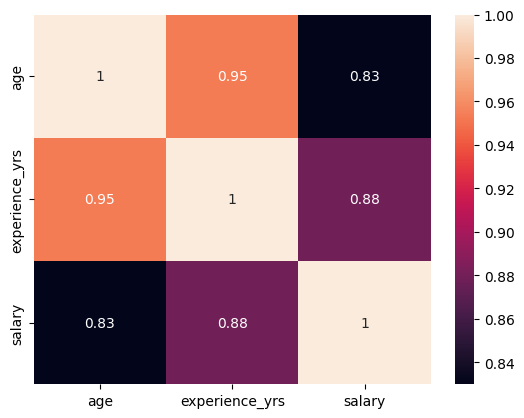

In [ ]:
sns.heatmap(corr,annot=True)

**Data Visualization- Bar Chart,Box Plot,Histogram**

In [ ]:
data1['education'].value_counts()

,count
education,
BSc,296
MSc,127
PhD,49


<Axes: xlabel='education'>

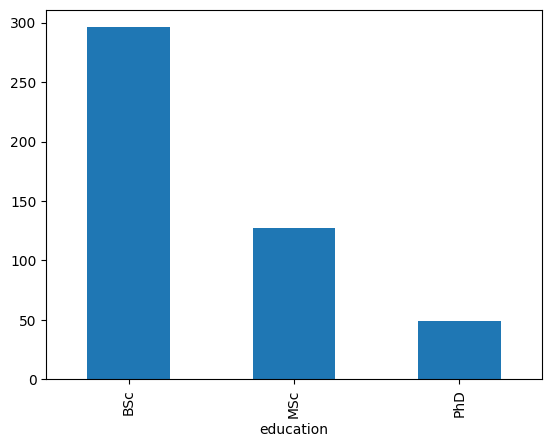

In [ ]:
data1['education'].value_counts().plot(kind='bar')

In [ ]:
data1['role'].value_counts()

,count
role,
Senior Data Engineer,83
Data Scientist,82
Junior Analyst,81
Lead Data Scientist,79
Data Analyst,75
ML Engineer,72


<Axes: ylabel='gender'>

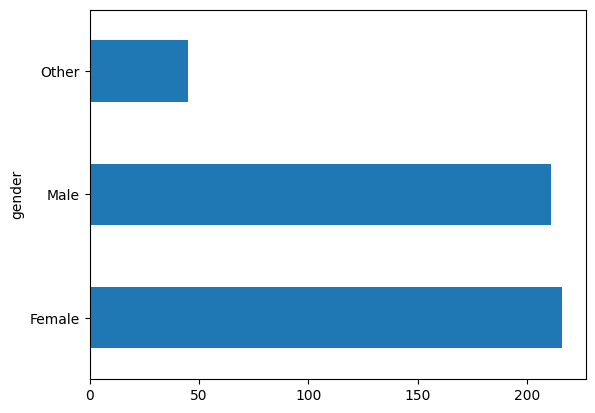

In [ ]:
data1['gender'].value_counts().plot(kind ='barh')

### **Numerical Variable-Plot Histogram/box plot:**

<Axes: ylabel='Frequency'>

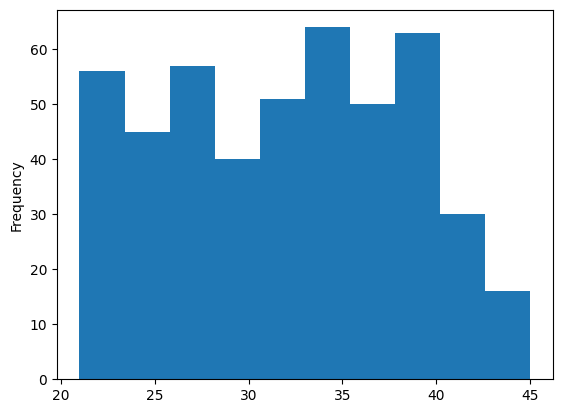

In [ ]:
data1.age.plot(kind='hist')

<Axes: >

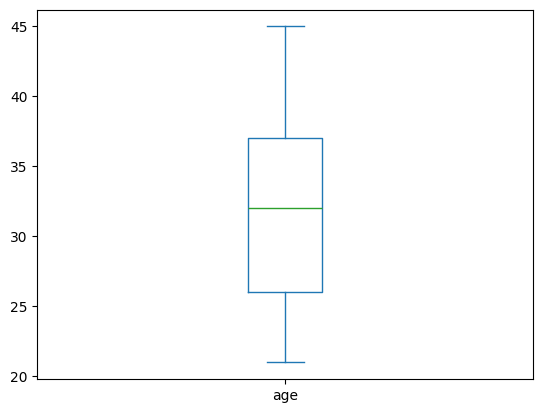

In [ ]:
data1.age.plot(kind='box')

<Axes: >

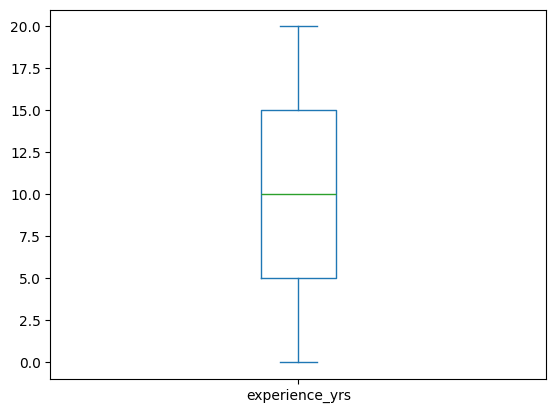

In [ ]:
data1.experience_yrs.plot(kind='box')

<Axes: ylabel='Frequency'>

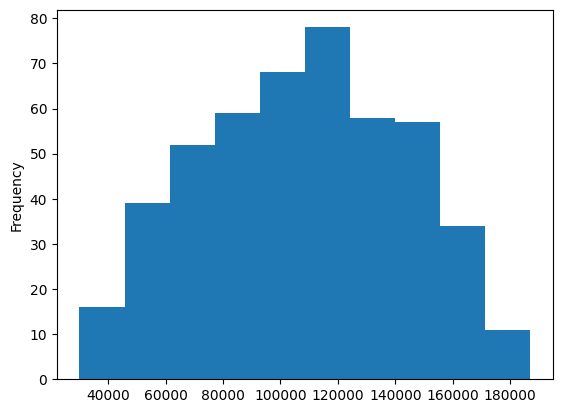

In [ ]:
data1.salary.plot(kind='hist')

## **Feature Engineering**

### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

In [ ]:
data1['gender_Encode']=Label_Encoder.fit_transform(data1['gender'])

/tmp/ipython-input-29-2475375146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['gender_Encode']=Label_Encoder.fit_transform(data1['gender'])


In [ ]:
data1['education_Encode']=Label_Encoder.fit_transform(data1['education'])

/tmp/ipython-input-30-3477377222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['education_Encode']=Label_Encoder.fit_transform(data1['education'])


In [ ]:
data1['role_Encode']=Label_Encoder.fit_transform(data1['role'])

/tmp/ipython-input-31-2293450808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['role_Encode']=Label_Encoder.fit_transform(data1['role'])


### **Data After Label Encoding**

In [ ]:
data1.head()

,experience_yrs,age,gender,education,role,city_tier,industry,certifications,salary,gender_Encode,education_Encode,role_Encode
0,5.0,30,Female,MSc,Junior Analyst,Tier-2,Tech,5.0,75000,0,1,2
1,11.0,35,Female,BSc,ML Engineer,Tier-3,Retail,4.0,92000,0,0,4
3,8.0,30,Female,MSc,Senior Data Engineer,Tier-2,Healthcare,5.0,124000,0,1,5
4,7.0,26,Female,MSc,Junior Analyst,Tier-3,Retail,1.0,64000,0,1,2
5,5.0,26,Female,BSc,Data Analyst,Tier-1,Finance,1.0,69000,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

### **Feature Scalling**

In [ ]:
data1['age_scaled']=std_scaler.fit_transform(data1[['age']])
data1['experience_yrs_scaled']=std_scaler.fit_transform(data1[['experience_yrs']])

/tmp/ipython-input-62-3335893469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['age_scaled']=std_scaler.fit_transform(data1[['age']])
/tmp/ipython-input-62-3335893469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['experience_yrs_scaled']=std_scaler.fit_transform(data1[['experience_yrs']])


### **Data After Scalling**

In [ ]:
data.head()

,experience_yrs,age,gender,education,role,city_tier,industry,certifications,salary
0,5.0,30,Female,MSc,Junior Analyst,Tier-2,Tech,5.0,75000
1,11.0,35,Female,BSc,ML Engineer,Tier-3,Retail,4.0,92000
2,7.0,30,Male,BSc,Junior Analyst,Tier-1,NaN,4.0,86000
3,8.0,30,Female,MSc,Senior Data Engineer,Tier-2,Healthcare,5.0,124000
4,7.0,26,Female,MSc,Junior Analyst,Tier-3,Retail,1.0,64000


### **Dependent And Independent Features**

In [ ]:
x=data1[['age_scaled','gender_Encode','education_Encode','role_Encode','experience_yrs_scaled']]
y=data1['salary']

In [ ]:
x.head()

,age_scaled,gender_Encode,education_Encode,role_Encode,experience_yrs_scaled
0,-0.299499,0,1,2,-0.794607
1,0.478935,0,0,4,0.177457
3,-0.299499,0,1,5,-0.308575
4,-0.922246,0,1,2,-0.470586
5,-0.922246,0,0,0,-0.794607


### **Splitting the data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,age_scaled,gender_Encode,education_Encode,role_Encode,experience_yrs_scaled
451,-0.766559,0,2,5,-1.118628
24,1.257369,1,1,0,1.473541
480,-0.766559,1,2,1,-0.470586
51,1.724429,1,0,3,1.635552
260,-1.233620,1,2,0,-1.442649


### **Model Development**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Linear_regeression_model=LinearRegression()

In [ ]:
Linear_regeression_model.fit(x_train,y_train)

LinearRegression()

### **Model Predictions**

In [ ]:
y_pred_lr=Linear_regeression_model.predict(x_test)
y_pred_lr

array([ 69318.29364609, 116180.96495963,  65149.26452052,  90083.8759505 ,
        90056.40110903, 110088.71079577,  69798.0056574 ,  95426.66253837,
        60241.68020094, 140999.62014424,  64184.85978266, 130132.16908553,
       146854.87616123, 141346.94473084,  85528.53129268, 151547.52331894,
        45133.21543216,  79838.72197931, 146777.60900041, 146794.40768093,
        84757.28432094,  95245.02087643, 121225.91741916, 100907.1191273 ,
       135987.35946245, 111790.76514433, 131085.0577192 ,  64350.54270731,
       131652.94927332, 115717.74976774,  49677.28020683, 130853.92559901,
       109664.42090946, 151520.41597864,  70475.55428897, 120229.42462577,
        90237.74090987, 121661.42154856, 161935.32800641, 130810.0195782 ,
       156774.41930151, 171960.1512311 , 130567.67321492, 126293.66586603,
        55113.22705274,  85496.14137605, 176273.38574668,  94407.07189654,
       141842.91734054,  49693.47516514,  95051.86311031, 125378.75158642,
        95217.30981393,  

In [ ]:
df=pd.DataFrame({'y_Actual' :y_test,'y_Predicted': y_pred_lr})
df['Error']=df['y_Actual']-df['y_Predicted']
df['abs_error']=abs(df['Error'])
Mean_absolute_Error=df['abs_error'].mean()
Mean_absolute_Error

np.float64(9615.604718786419)

### **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

**Model Accuracy**

In [ ]:
r2_score(y_test,y_pred_lr)

0.8942797264082399

In [ ]:
print(f'Accuracy of the model={round(r2_score(y_test,y_pred_lr),4)*100}%')

Accuracy of the model=89.42999999999999%


**Mean Absolute Error:**

In [ ]:
round(mean_absolute_error(y_test,y_pred_lr),2)

9615.6

In [ ]:
print(f"Mean Absolute Error={round(mean_absolute_error(y_test,y_pred_lr),2)}")

Mean Absolute Error=9615.6


**Mean Squared Error**

In [ ]:
mse=round(mean_squared_error(y_test,y_pred_lr),2)
mse

135773718.4

### **Coefficients**

In [ ]:
Linear_regeression_model.coef_

array([-7.78313886e+02, -1.61949583e+01,  9.96381666e+03,  4.89108750e+03,
        3.23318981e+04])

### **Intercepts**

In [ ]:
Linear_regeression_model.intercept_

np.float64(90469.34334366283)

### **Customize Predictions**



*   Age=26
*   Gender='Female'=0
*   Eduaction='BSc'=1
*   Role='Junior Analyst'=2
*   Experience_yrs=7
*   Salary=?







In [ ]:
age1=std_scaler.transform([[49]])
age1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[6.33385935]])

In [ ]:
experience_yrs1=std_scaler.transform([[7]])
experience_yrs1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.47058588]])

In [ ]:
age1=std_scaler.transform([[26]])
age=6.33385935
gender=0
education=1
role=2
experience_yrs1=std_scaler.transform([[7]])
experience_yrs=-0.470585888

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
Emp_salary=Linear_regeression_model.predict([[experience_yrs,age,gender,education,role]])
Emp_salary

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([160287.91393009])

In [ ]:
print("Salary of that Employee with above attributes  =",Emp_salary[0])

Salary of that Employee with above attributes  = 160287.91393008752
